In [39]:
from filecmp import cmp
from cv2 import WINDOW_FULLSCREEN
import os
import numpy as np
import cv2, pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

In [40]:
data_list = os.listdir('data/Sample1')
dicom_path = os.path.join('data/Sample1',data_list[0])
slice = pydicom.read_file(dicom_path)

In [41]:
slice

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 4625.38405.33988.17340.36372.43091.37138.15103.100.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.5.3
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_353'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 4625.38405.33988.17340.36372.43091.37138.15103.100.0
(0008, 0020) Study Date                    

In [42]:
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array + b

In [43]:
image.shape

(512, 512)

In [44]:
np.min(image), np.max(image)

(-347, 928)

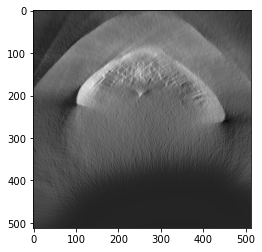

In [45]:
plt.imshow(image, cmap='gray')

In [46]:
test_img = cv2.imread('data/dog.jpg')
test_img.shape

(560, 560, 3)

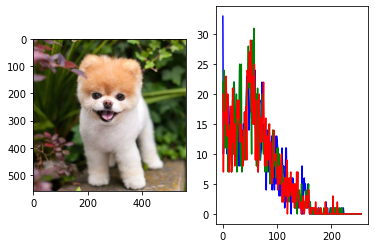

In [47]:
test_hist1 = cv2.calcHist(test_img, [0], None, [256], [0, 256])
test_hist2 = cv2.calcHist(test_img, [1], None, [256], [0, 256])
test_hist3 = cv2.calcHist(test_img, [2], None, [256], [0, 256])
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.plot(test_hist1, color='b')
plt.plot(test_hist2, color='g')
plt.plot(test_hist3, color='r')

In [48]:
hist = cv2.calcHist(image, [0], None, [2001], (-1000, 1001))

plt.plot(hist)

error: OpenCV(4.5.5) D:\bld\libopencv_1647515827160\work\modules\imgproc\src\histogram.cpp:1007: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'


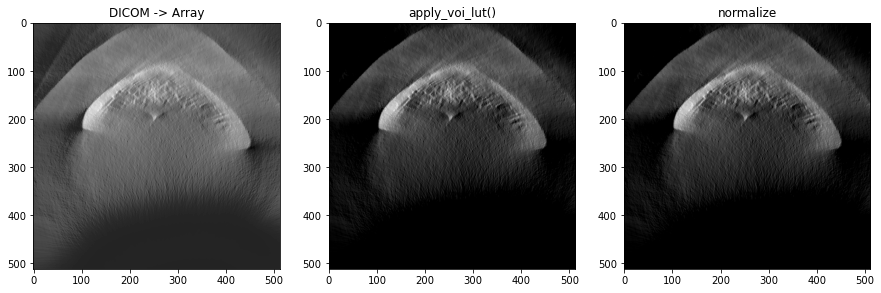

In [49]:

plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
plt.title('DICOM -> Array')
plt.imshow(image, cmap='gray')

window_center = slice.WindowCenter
window_width = slice.WindowWidth
image = apply_modality_lut(image, slice)
image2 = apply_voi_lut(image, slice)
plt.subplot(1, 3, 2)
plt.title('apply_voi_lut()')
plt.imshow(image2, cmap='gray')

image3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))
plt.subplot(1, 3, 3)
plt.title('normalize')
plt.imshow(image3, cmap='gray')

plt.show()

In [54]:
np.min(image), np.max(image)

(-1371.0, -96.0)

In [50]:
np.min(image2), np.max(image2)

(-1024.0, -95.99999999999989)

In [51]:
np.min(image3), np.max(image3)

(-1024.0, -96.0)

In [53]:
slice.WindowCenter, slice.WindowWidth

('1024.0', '4096.0')